In [1]:
from ensembles import VanillaEnsemble
from datasets import make_dataset
from plot import plot_dataset, plot_prediction
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12, 4]
from evaluation import evaluate_model

# Preparations

In [2]:
num_epochs = 100
params = {'num_neurons':[10,10,10],'num_epochs':num_epochs,'learning_rate':0.001}


In [3]:
data = make_dataset()

X = data['X']
y = data['y']
generate_sinoid = data['generating']
sorted_index = data['shuffle_index']

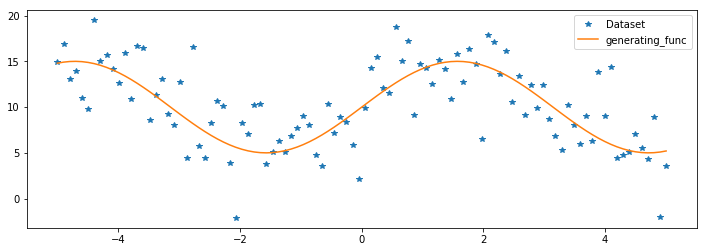

In [4]:
plot_dataset(X,y,sorted_index,generating_func=generate_sinoid)

# initialise Networks

In [5]:
from estimators import GaussianLossEstimator,GaussianLearningRateEstimator

gauss = GaussianLossEstimator(**params)
gauss_lr = GaussianLearningRateEstimator(**params)

In [6]:
gauss_preds = gauss.predict(X)
gauss_var = gauss.predict_var(X)



lr_preds = gauss_lr.predict(X)
lr_var = gauss_lr.predict_var(X)

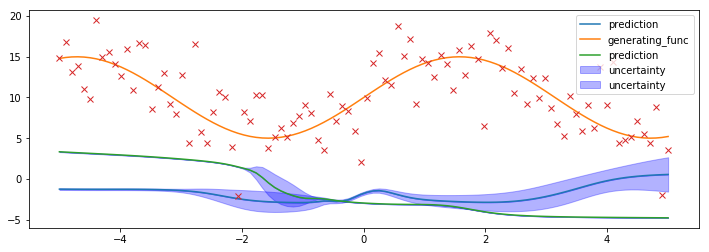

In [7]:
plot_prediction(X,gauss_preds,sorted_index,gauss_var,generating_func=generate_sinoid)
plot_prediction(X,lr_preds,sorted_index,lr_var)
plt.plot(X,y,'x')

In [8]:
evaluate_model(X,y,gauss_preds)

RSME is 12.953968606145263


In [9]:
evaluate_model(X,y,lr_preds)

RSME is 12.83682687582964


# Training


In [10]:
gauss.train(X,y)
gauss_lr.train(X,y)

In [11]:
gauss_preds = gauss.predict(X)
gauss_var = gauss.predict_var(X)

lr_preds = gauss_lr.predict(X)
lr_var = gauss_lr.predict_var(X)

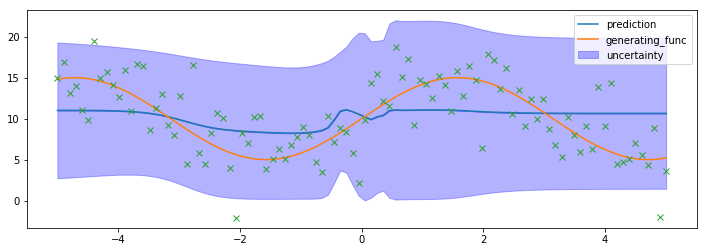

In [12]:
plot_prediction(X,gauss_preds,sorted_index,gauss_var,generating_func=generate_sinoid)
plt.plot(X,y,'x')

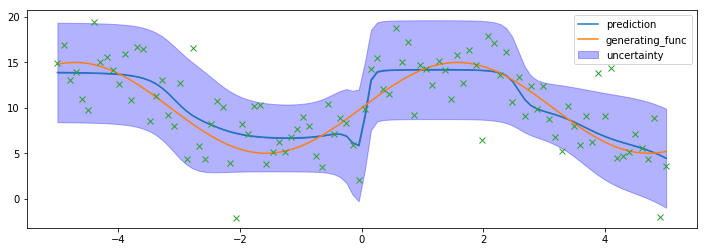

In [13]:
plot_prediction(X,lr_preds,sorted_index,lr_var,generating_func=generate_sinoid)
plt.plot(X,y,'x')

In [14]:
evaluate_model(X,y,gauss_preds)

RSME is 4.174736581238996


In [15]:
evaluate_model(X,y,lr_preds)

RSME is 2.971236426142238
